# Projekt LAB 1 Dane Facebook 
Maciej Klimiuk , Hanna Mika



In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics._regression import root_mean_squared_error




In [62]:
# Wczytaj dane
data = pd.read_csv("data.csv", sep=";")
# nowa kolumna o nazwie koszty = przychód - zysk 
data["Koszty w mln $"] = data["Przychód w mln $"] - data["Zysk w mln $"]
print(data)


    Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  Użytkownicy_mln  \
0  2009               777           229          1218              360   
1  2010              1974           606          2127              608   
2  2011              3711          1000          3200              845   
3  2012              5089            53          4619             1056   
4  2013              7872          1500          6337             1228   
5  2014             12466          2940          9199             1393   
6  2015             17928          3688         12691             1591   
7  2016             27638         10217         17048             1860   
8  2017             40653         15934         25105             2129   

   Koszty w mln $  
0             548  
1            1368  
2            2711  
3            5036  
4            6372  
5            9526  
6           14240  
7           17421  
8           24719  


In [63]:

# wszystkie korelacje
print(data.corr())


                       Rok  Przychód w mln $  Zysk w mln $  Zatrudnienie  \
Rok               1.000000          0.923356      0.834622      0.940966   
Przychód w mln $  0.923356          1.000000      0.977966      0.997977   
Zysk w mln $      0.834622          0.977966      1.000000      0.963747   
Zatrudnienie      0.940966          0.997977      0.963747      1.000000   
Użytkownicy_mln   0.997651          0.933496      0.852985      0.949059   
Koszty w mln $    0.959960          0.990269      0.939397      0.996427   

                  Użytkownicy_mln  Koszty w mln $  
Rok                      0.997651        0.959960  
Przychód w mln $         0.933496        0.990269  
Zysk w mln $             0.852985        0.939397  
Zatrudnienie             0.949059        0.996427  
Użytkownicy_mln          1.000000        0.964372  
Koszty w mln $           0.964372        1.000000  



Współczynniki modelu R^2:  -0.3177344697032034
Współczynnik modelu RMSE: 40074962.06919522


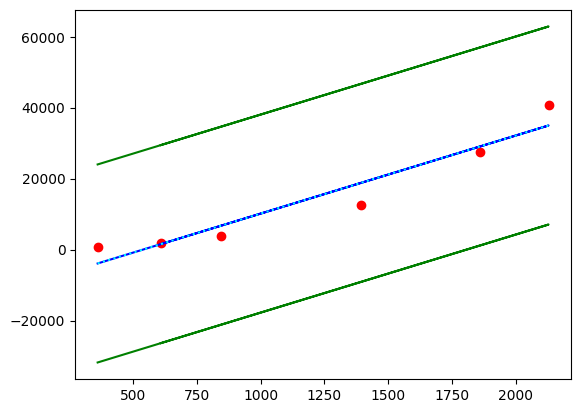

In [64]:

#1. Przychód (OY) od liczby użytkowników (OX)
# do POPRAWY
#model liniowy nr 2
print()
X_train, X_test, y_train, y_test = train_test_split(data[["Użytkownicy_mln"]], data["Przychód w mln $"], test_size=0.3, random_state=None)


model = LinearRegression()
model.fit(X_train, y_train)


# Prognozy i przedziały ufności dla danych pierwotnych
y_pred_test = model.predict(X_test)
y_pred_all = model.predict(data[["Użytkownicy_mln"]])

print("Współczynniki modelu R^2: ", model.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

#Dodanie prognoz na całym zbiorze 



#wykresy z predykcjami i przedziałami ufności 0.95
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')

# Dodanie prognoz na całym zbiorze w postaci linii (bez nakładania się)
plt.plot(data[["Użytkownicy_mln"]], y_pred_all, color = 'cyan', label='Prognozy na całym zbiorze', linestyle='dotted')

plt.plot(X_train, model.predict(X_train) + 1.96 * np.std(model.predict(X_train)), color = 'green')
plt.plot(X_train, model.predict(X_train) - 1.96 * np.std(model.predict(X_train)), color = 'green')
plt.show()


Współczynniki modelu R^2:  0.9779612793427525
Współczynnik modelu RMSE: 426283.4302810077


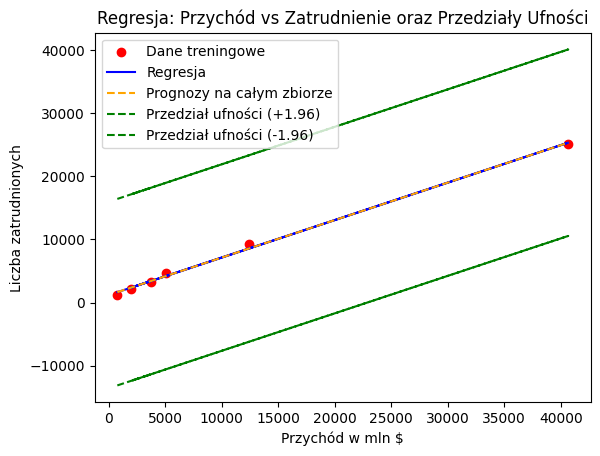

In [65]:
#3. Przychód(OX)  liczba pracowników (OY)

# DO POPRAWY

#model liniowy nr 2
# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(data[["Przychód w mln $"]], data["Zatrudnienie"], test_size=0.3, random_state=None)

# Trenowanie modelu
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Prognozy dla danych testowych
y_pred_test = model2.predict(X_test)

# Prognozy dla wszystkich danych
y_pred_all = model2.predict(data[["Przychód w mln $"]])

# Obliczenie współczynnika R^2 oraz RMSE
print("Współczynniki modelu R^2: ", model2.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model2.predict(X_train), color = 'blue', label='Regresja')

# Dodanie prognoz na całym zbiorze 
plt.plot(data[["Przychód w mln $"]], y_pred_all, color = 'orange',  linestyle='dashed', label='Prognozy na całym zbiorze')

# Obliczanie przedziału ufności na poziomie 0.95
# Zakładając, że rozkład błędów jest normalny, można dodać ±1.96 odchylenia standardowego od prognoz
std_error = np.std(y_pred_all)
plt.plot(X_train, model2.predict(X_train) + 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (+1.96)')
plt.plot(X_train, model2.predict(X_train) - 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (-1.96)')

# Dodanie legendy i tytułów
plt.legend()
plt.xlabel("Przychód w mln $")
plt.ylabel("Liczba zatrudnionych")
plt.title("Regresja: Przychód vs Zatrudnienie oraz Przedziały Ufności")
plt.show()




Współczynniki modelu R^2:  0.9926223072635293
Współczynnik modelu RMSE: 818852.2022487029


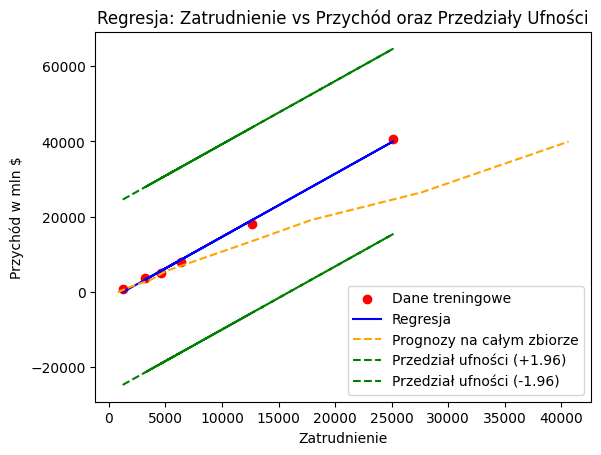

In [66]:
#4. Liczba pracowników (OX) przychód(OY)

X_train, X_test, y_train, y_test = train_test_split(data[["Zatrudnienie"]], data["Przychód w mln $"], test_size=0.3, random_state=42)
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Trenowanie modelu
model3 = LinearRegression()
model3.fit(X_train, y_train)

# Prognozy dla danych testowych
y_pred_test = model3.predict(X_test)

# Prognozy dla wszystkich danych
y_pred_all = model3.predict(data[["Zatrudnienie"]])

# Obliczenie współczynnika R^2 oraz RMSE
print("Współczynniki modelu R^2: ", model3.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))

# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model3.predict(X_train), color = 'blue', label='Regresja')

# Dodanie prognoz na całym zbiorze
plt.plot(data[["Przychód w mln $"]], y_pred_all, color = 'orange', linestyle='dashed', label='Prognozy na całym zbiorze')

# Obliczanie przedziału ufności na poziomie 0.95
# Zakładając, że rozkład błędów jest normalny, można dodać ±1.96 odchylenia standardowego od prognoz
std_error = np.std(y_pred_all)
plt.plot(X_train, model3.predict(X_train) + 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (+1.96)')
plt.plot(X_train, model3.predict(X_train) - 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (-1.96)')

# Dodanie legendy i tytułów
plt.legend()
plt.xlabel("Zatrudnienie")
plt.ylabel("Przychód w mln $")
plt.title("Regresja: Zatrudnienie vs Przychód oraz Przedziały Ufności")
plt.show()


Współczynniki modelu R^2:  0.9697451579659774
Współczynnik modelu RMSE: 2982.663516976772


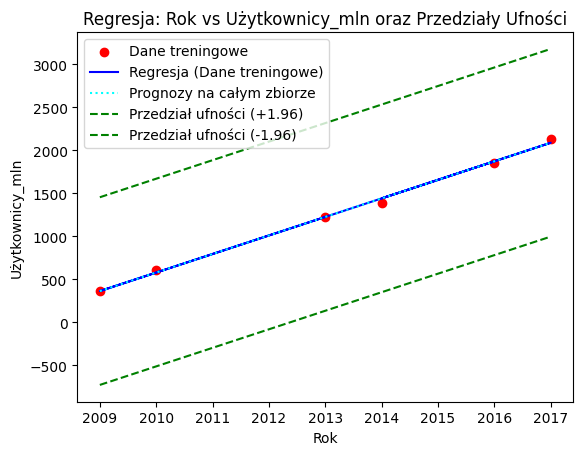

In [67]:
#5. Liczba użytkowników (OY) od czasu (OX)

X_train, X_test, y_train, y_test = train_test_split(data[["Rok"]], data["Użytkownicy_mln"], test_size=0.3, random_state=None)


# Trenowanie modelu
model4 = LinearRegression()
model4.fit(X_train, y_train)

# Prognozy dla danych testowych
y_pred_test = model4.predict(X_test)

# Prognozy dla wszystkich danych
y_pred_all = model4.predict(data[["Rok"]])

# Obliczenie współczynnika R^2 oraz RMSE
print("Współczynniki modelu R^2: ", model4.score(X_test, y_test))
print("Współczynnik modelu RMSE:", mean_squared_error(y_test, y_pred_test))


# Wykres
plt.scatter(X_train, y_train, color = 'red', label='Dane treningowe')
plt.plot(X_train, model4.predict(X_train), color = 'blue', label='Regresja (Dane treningowe)')

# Dodanie prognoz na całym zbiorze w postaci linii (bez nakładania się)
plt.plot(data[["Rok"]], y_pred_all, color = 'cyan', label='Prognozy na całym zbiorze', linestyle='dotted')

# Obliczanie przedziału ufności na poziomie 0.95
# Zakładając, że rozkład błędów jest normalny, można dodać ±1.96 odchylenia standardowego od prognoz
std_error = np.std(y_pred_all)
plt.plot(data[["Rok"]], model4.predict(data[["Rok"]]) + 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (+1.96)')
plt.plot(data[["Rok"]], model4.predict(data[["Rok"]]) - 1.96 * std_error, color = 'green', linestyle='dashed', label='Przedział ufności (-1.96)')

#  Dodanie legendy i tytułów
plt.legend()
plt.xlabel("Rok")
plt.ylabel("Użytkownicy_mln")
plt.title("Regresja: Rok vs Użytkownicy_mln oraz Przedziały Ufności")


plt.show()






In [93]:
# Logarytmiczna transformacja kosztów i zysków
X = np.log(data[["Koszty w mln $"]])
y = np.log(data["Zysk w mln $"])
# dane testowe dla lat 2018-2021
X_train =[2018, 2019, 2020, 2021]
# Podział na zestaw treningowy i testowy

# Model regresji
model = LinearRegression()
model.fit(X, y)

# Prognozy na danych treningowych i testowych
#y_pred_test = model.predict(X_train)

#
# zmienic zeby dane testowe trzeba wyliczyć samemu z funkcji a te uzyc całkowicie do wytrainowania modelu


LinearRegression()

In [58]:
# wykresy

fig = px.scatter_matrix(data)
fig.show()
 